In [1]:
import numpy as np
# Load the data table that contains the young nuclear Cluster
raw = np.loadtxt("/u/ryotainagaki/Desktop/YGCDataV2.dat", dtype ='object')

In [2]:
new_arr = raw.astype('float64')

In [3]:
new_arr[np.argsort(new_arr[:, 1])]

array([[3.000e-02, 1.060e+01],
       [8.000e-02, 1.064e+01],
       [7.000e-02, 1.075e+01],
       [6.000e-02, 1.105e+01],
       [3.800e-01, 1.109e+01],
       [1.200e-01, 1.123e+01],
       [3.700e-01, 1.128e+01],
       [1.200e-01, 1.147e+01],
       [3.000e-02, 1.175e+01],
       [1.400e-01, 1.202e+01],
       [1.200e-01, 1.209e+01],
       [5.000e-02, 1.210e+01],
       [4.000e-02, 1.213e+01],
       [3.000e-02, 1.221e+01],
       [5.000e-02, 1.222e+01],
       [9.000e-02, 1.228e+01],
       [6.000e-02, 1.230e+01],
       [3.000e-02, 1.246e+01],
       [4.000e-02, 1.250e+01],
       [5.000e-02, 1.265e+01],
       [1.200e-01, 1.267e+01],
       [6.000e-02, 1.288e+01],
       [1.000e-02, 1.292e+01],
       [3.000e-02, 1.298e+01],
       [3.000e-02, 1.307e+01],
       [3.000e-02, 1.322e+01],
       [7.000e-02, 1.323e+01],
       [9.000e-02, 1.332e+01],
       [1.000e-01, 1.333e+01],
       [9.000e-02, 1.334e+01],
       [6.000e-02, 1.346e+01],
       [1.100e-01, 1.358e+01],
       [

In [4]:
from astropy.table import Table
YGC_Table = Table(new_arr , names = ["KpErr", "Kp"])

In [5]:
bins = np.linspace(10,16,7)
import matplotlib.pyplot as plt
plt.hist(YGC_Table['Kp'], bins = bins, histtype='step', align='mid', color = 'r')
bins

array([10., 11., 12., 13., 14., 15., 16.])

NOW, I NEED TO CONSIDER ERROR BARS. FIRST WHAT IS THE MINIMUM FOR EACH BIN?

In [6]:
num_in_bins=[0 for x in bins]
def grouper(bin_number):
    tab_slice = YGC_Table[np.where(np.abs(YGC_Table['Kp'] - 0.5) <= (10.5+bin_number))[0]]
    print(10.5+bin_number)
    print(tab_slice)
    # Assume that due to the nature of the floating point and as we have seen above
    # there are no numbers that are exactly 11.0
    num_in_bins[bin_number] +=len(np.where((tab_slice['Kp'] - tab_slice['KpErr'])>=bins[bin_number])[0])
for x in map(grouper, range(len(bins))):
    print(x)

10.5
KpErr   Kp 
----- -----
 0.07 10.75
 0.08 10.64
 0.03  10.6
None
11.5
KpErr   Kp 
----- -----
 0.12 11.47
 0.07 10.75
 0.12 11.23
 0.08 10.64
 0.03  10.6
 0.37 11.28
 0.38 11.09
 0.03 11.75
 0.06 11.05
None
12.5
KpErr   Kp 
----- -----
 0.05 12.22
 0.12 12.67
 0.06 12.88
 0.05 12.65
 0.12 11.47
 0.07 10.75
 0.12 12.09
 0.14 12.02
 0.12 11.23
 0.08 10.64
  ...   ...
 0.06  12.3
 0.03  10.6
 0.03 12.21
 0.37 11.28
 0.09 12.28
 0.38 11.09
 0.03 12.46
 0.03 11.75
 0.05  12.1
 0.06 11.05
 0.03 12.98
Length = 24 rows
None
13.5
KpErr   Kp 
----- -----
 0.14 13.88
 0.05 12.22
 0.09 13.69
 0.03 13.22
 0.12 12.67
 0.15 13.63
 0.06 12.88
 0.05 12.65
 0.11 13.58
 0.12 11.47
  ...   ...
 0.02 13.82
 0.38 11.09
  0.1 13.33
 0.03 12.46
 0.03 11.75
 0.05  12.1
 0.06 11.05
 0.12 13.83
 0.09 13.98
 0.07 13.23
 0.03 12.98
Length = 40 rows
None
14.5
KpErr   Kp 
----- -----
 0.07 14.39
 0.07 14.96
 0.03 14.82
 0.14 14.51
 0.08 14.42
 0.14 13.88
 0.05 12.22
 0.09 13.69
 0.17 14.88
 0.03 13.22
  ...   .

In [7]:
num_in_bins

[3, 3, 13, 16, 16, 9, 0]

In [8]:
len(YGC_Table)

67

Before I dive into functions (had to debug and check), I shall confirm that neither 'Kp' values nor the 'Kp' +/- '$\sigma_{Kp}$' values are going to be clean integers. This will allow us to use the less than or equals to inequalities when dealing with bins. (generally numpy bins are not inclusive intervals).

In [9]:
np.any([x==int(y) for x, y in zip(YGC_Table['Kp'], YGC_Table['Kp'])])

False

In [10]:
np.any([x - y==int(x - y) for x, y in zip(YGC_Table['Kp'], YGC_Table['KpErr'])])

False

In [11]:
np.any([x + y==int(x + y) for x, y in zip(YGC_Table['Kp'], YGC_Table['KpErr'])])

False

Hence, I do not have to worry about the equals to part of the LEQ operation misassigning a Kp to a bin.

Now I try to calculate the minimum bound of elements in the $K_p$ bins by eliminating elements whose $K_p - \sigma_{K_p}$ or $K_p + \sigma_{K_p}$ can be outside of the bin $K_p$ is in.

In [12]:
num_in_bins=[0 for x in bins]
# For this snippet of code, I shall assume that the bin width is 1.
def lower_bound(bin_number, bin_width=1):
    """
    Find a lower bound for the number of young stars in the K' bin.
    """
    tab_slice = YGC_Table[np.where(np.abs(YGC_Table['Kp'] - (10.5 + bin_width * bin_number)) <= 0.5)[0]]
    # Should not have to many problems as there are no tab_sl
    # We want to make
    num_in_bins[bin_number] += len(np.where((np.abs(tab_slice['Kp'] - tab_slice['KpErr'] - (10.5 + bin_width * bin_number)) <= 0.5) &
                                               (np.abs(tab_slice['Kp'] + tab_slice['KpErr'] - (10.5 + bin_width * bin_number)) <= 0.5))[0])
for x in map(grouper, range(len(bins))):
    print(x)

10.5
KpErr   Kp 
----- -----
 0.07 10.75
 0.08 10.64
 0.03  10.6
None
11.5
KpErr   Kp 
----- -----
 0.12 11.47
 0.07 10.75
 0.12 11.23
 0.08 10.64
 0.03  10.6
 0.37 11.28
 0.38 11.09
 0.03 11.75
 0.06 11.05
None
12.5
KpErr   Kp 
----- -----
 0.05 12.22
 0.12 12.67
 0.06 12.88
 0.05 12.65
 0.12 11.47
 0.07 10.75
 0.12 12.09
 0.14 12.02
 0.12 11.23
 0.08 10.64
  ...   ...
 0.06  12.3
 0.03  10.6
 0.03 12.21
 0.37 11.28
 0.09 12.28
 0.38 11.09
 0.03 12.46
 0.03 11.75
 0.05  12.1
 0.06 11.05
 0.03 12.98
Length = 24 rows
None
13.5
KpErr   Kp 
----- -----
 0.14 13.88
 0.05 12.22
 0.09 13.69
 0.03 13.22
 0.12 12.67
 0.15 13.63
 0.06 12.88
 0.05 12.65
 0.11 13.58
 0.12 11.47
  ...   ...
 0.02 13.82
 0.38 11.09
  0.1 13.33
 0.03 12.46
 0.03 11.75
 0.05  12.1
 0.06 11.05
 0.12 13.83
 0.09 13.98
 0.07 13.23
 0.03 12.98
Length = 40 rows
None
14.5
KpErr   Kp 
----- -----
 0.07 14.39
 0.07 14.96
 0.03 14.82
 0.14 14.51
 0.08 14.42
 0.14 13.88
 0.05 12.22
 0.09 13.69
 0.17 14.88
 0.03 13.22
  ...   .

In [13]:
num_in_bins

[3, 3, 13, 16, 16, 9, 0]

Now I try to calculate the maximum bound of the number of stars in bin x by including elements whose $K_p - \sigma_{K_p}$ or $K_p + \sigma_{K_p}$ can be included in the bin x is in. Also all elements whose $K_p$ is in the bin x are kept in the bin.

In [14]:
num_in_bins2 = [0 for x in bins]
def grouper_2(bin_number, bin_width=1):
    print(10.5 + bin_width * bin_number)
    tab_slice = YGC_Table[np.where(np.abs(YGC_Table['Kp'] - (10.5 + bin_width * bin_number)) <= 0.5)[0]]
    others_to_check = YGC_Table[np.where(np.abs(YGC_Table['Kp'] - 0.5) > (10.5 + bin_width * bin_number))[0]]
    print(len(tab_slice))
    print(len(others_to_check))
    print("Bin", bin_number)
    num_in_bins2[bin_number] += (len(tab_slice) +
                                 len(np.where((np.abs(others_to_check['Kp'] - others_to_check['KpErr'] - (10.5 + bin_width * bin_number)) <=  0.5) |
                                                (np.abs(others_to_check['Kp'] + others_to_check['KpErr'] - (10.5 + bin_width * bin_number)) <= 0.5))[0]))
for x in map(grouper_2, range(len(bins))):
    x

10.5
3
64
Bin 0
11.5
6
58
Bin 1
12.5
15
43
Bin 2
13.5
16
27
Bin 3
14.5
18
9
Bin 4
15.5
9
0
Bin 5
16.5
0
0
Bin 6


In [15]:
num_in_bins2

[6, 8, 15, 18, 18, 9, 0]

Text(0.5, 1.0, "$K_p$ band Luminosity function (Error bars are made using maximum possible \n |difference between established K' and K' +/- $\\sigma_{K'}$|)")

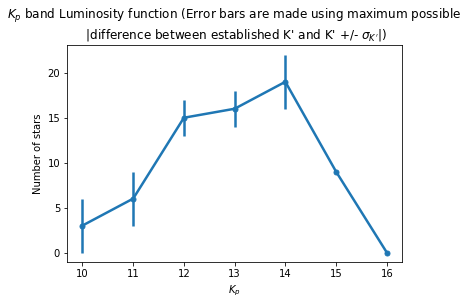

In [16]:
def add_by_one_x(x):
    """Increment x-1th term in binned counts"""
    binned_counts[x-1] +=1

binned_counts_help = np.digitize(new_arr[:, 1], bins)
binned_counts = [0 for x in bins]
round_up = np.vectorize(add_by_one_x)(binned_counts_help)
max_error_bound = np.vectorize(lambda x, y: max(abs(x), abs(y)))
plt.errorbar(bins, binned_counts,yerr=max_error_bound(np.array(num_in_bins2)- binned_counts,binned_counts-np.array(num_in_bins)), label='Number of Stars with $K_p = x$', lw=2.5,
            fmt='-o',ms=5)
plt.xlabel("$K_p$")
plt.ylabel("Number of stars")
plt.title("$K_p$ band Luminosity function (Error bars are made using maximum possible \n |difference between established K' and K' +/- $\sigma_{K'}$|)")

In [17]:
binned_counts

[3, 6, 15, 16, 19, 9, 0]

In [18]:
new_arr[:, 1]

array([14.39, 14.96, 14.82, 15.27, 15.41, 14.51, 14.42, 15.31, 13.88,
       12.22, 13.69, 14.88, 13.22, 12.67, 14.29, 15.05, 13.63, 12.88,
       12.65, 13.58, 14.75, 11.47, 14.11, 10.75, 13.32, 12.09, 12.02,
       15.42, 11.23, 15.38, 10.64, 12.92, 13.34, 12.5 , 14.07, 13.07,
       14.99, 15.25, 12.13, 15.15, 13.46, 14.21, 12.3 , 10.6 , 13.72,
       12.21, 11.28, 14.57, 12.28, 13.7 , 14.24, 13.82, 11.09, 13.33,
       12.46, 11.75, 12.1 , 11.05, 13.83, 13.98, 14.46, 15.43, 13.23,
       12.98, 14.76, 14.35, 14.36])

In [19]:
np.digitize(new_arr[:, 1], bins)

array([5, 5, 5, 6, 6, 5, 5, 6, 4, 3, 4, 5, 4, 3, 5, 6, 4, 3, 3, 4, 5, 2,
       5, 1, 4, 3, 3, 6, 2, 6, 1, 3, 4, 3, 5, 4, 5, 6, 3, 6, 4, 5, 3, 1,
       4, 3, 2, 5, 3, 4, 5, 4, 2, 4, 3, 2, 3, 2, 4, 4, 5, 6, 4, 3, 5, 5,
       5])

Now, introducing the BPASS Cluster.

In [ ]:
from spisea import synthetic
BPASS_iso = synthetic.Isochrone_Binary(6.7, 2.7, 8096, 0.0, min_mass = 1, max_mass = 150, filters=['nirc2,Kp'])

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/locations.py:346: UserWarning: Extinction files not found in /g/lu/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /g/lu/models/cdbs/mtab/*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/u/ryotainagaki/Desktop/PyPopStar/spisea/evolution.py:1792: RuntimeWarning: overflow encountered in power
  (1 / cs.au) * un.m)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = geta

Changing to T= 50000 for T=152940 logg=5.66
Changing to logg=5.00 for T=152940 logg=5.66
Changing to logg=4.00 for T= 31742 logg=3.79
Changing to T= 50000 for T=159805 logg=5.73
Changing to logg=5.00 for T=159805 logg=5.73
Changing to T= 50000 for T=153582 logg=5.67
Changing to logg=5.00 for T=153582 logg=5.67
Changing to logg=4.00 for T= 31652 logg=3.67
Changing to T= 50000 for T=112787 logg=5.26
Changing to logg=5.00 for T=112787 logg=5.26
Changing to T= 50000 for T=120629 logg=5.39
Changing to logg=5.00 for T=120629 logg=5.39
Changing to T= 50000 for T=152820 logg=5.66
Changing to logg=5.00 for T=152820 logg=5.66
Changing to logg=3.50 for T= 29065 logg=3.36
Changing to logg=4.00 for T= 31493 logg=3.62
Changing to T= 50000 for T=155561 logg=5.69
Changing to logg=5.00 for T=155561 logg=5.69
Changing to logg=4.00 for T= 31749 logg=3.71
Changing to logg=4.00 for T= 31278 logg=3.85
Changing to logg=4.00 for T= 31034 logg=3.89
Changing to logg=3.50 for T= 27150 logg=3.18
Changing to logg=

In [ ]:
from spisea import imf, ifmr
custom_IMF = imf.imf.IMF_broken_powerlaw(np.array([1, 200]), np.array([-1.7]), multiplicity=imf.multiplicity.MultiplicityResolvedDK())
BPASS_Cluster = synthetic.Binary_Cluster(BPASS_iso, custom_IMF, 20000, ifmr=ifmr.IFMR_Spera15())

In [ ]:
BPASS_Cluster.star_systems = BPASS_Cluster.star_systems[np.where(BPASS_Cluster.star_systems['m_nirc2_Kp']>=10.0)[0]]
def add_by_one_x_II(x):
    """Increment x-1th term in binned counts"""
    binned_counts2[x-1] +=1
binned_counts_help2 = np.digitize(BPASS_Cluster.star_systems['m_nirc2_Kp'][np.where(BPASS_Cluster.star_systems['m_nirc2_Kp']<15.5)[0]], bins)
binned_counts2 = [0 for x in bins]
round_up = np.vectorize(add_by_one_x_II)(binned_counts_help2)
plt.plot(bins, np.array(binned_counts2)/np.sum(binned_counts2), [0],
         color='blue',label='BPASS Cluster star systems')
plt.errorbar(bins, np.array(binned_counts)/len(new_arr),
             yerr=1/len(new_arr) * np.array(max_error_bound(np.array(num_in_bins2)- binned_counts,
                                                            binned_counts-np.array(num_in_bins))), 
         label='Actual Galactic Center young stars', lw=2.5, fmt='-o',ms=5)

plt.xlabel("$K_p$")
plt.ylabel("Fraction of star-systems")
plt.title("$K_p$ band Luminosity function (Error bars are made using maximum possible \n |difference between established K' and K' +/- $\sigma_{K'}$|)")

In [ ]:
MIST_iso = synthetic.IsochornePhot(6.7, 2.7, 8096, 0.0, min_mass = 1, max_mass = 150, filters=['nirc2,Kp'])

In [ ]:
MIST_Cluster = synthetic.ResolvedCluster(MIST_iso, custom_IMF, 20000, ifmr=ifmr.IFMR_Spera15())

In [ ]:
binned_counts_help2 = np.digitize(MIST_Cluster.star_systems['m_nirc2_Kp'], bins)
binned_counts2 = [0 for x in bins]
round_up = np.vectorize(add_by_one_x_II)(binned_counts_help2)
plt.plot(bins, np.array(binned_counts2)/np.sum(binned_counts2), color='blue',label='MIST Cluster star systems')
plt.errorbar(bins, binned_counts/len(new_arr), yerr=1/len(new_arr) * max_error_bound(np.array(num_in_bins2)- binned_counts,binned_counts-np.array(num_in_bins)), 
         label='Actual Galactic Center young stars', lw=2.5, fmt='-b',ms=5)

plt.xlabel("$K_p$")
plt.ylabel("Fraction of star-systems")
plt.title("$K_p$ band Luminosity function (Error bars are made using maximum possible \n |difference between established K' and K' +/- $\sigma_{K'}$|)")